# Exercise 4: LMS algorithm for stock price prediction

## 4.1 Introduction

In this exercise the *trainlms* function given below will be used.

**Tasks**

1. What does the function *trainlms* do?

In [1]:
import numpy as np
import itertools
def predict(W, A):
    return W@np.vstack([-np.ones((1, A.shape[1])), A])

def trainlms(ni, x, d, W, max_epoch):
    w=W.copy()
    
    n=0
    errors=[]
    while (n<max_epoch):
        n+=1
        y=predict(w, x)
        e=d-y
        w+=ni*e@np.vstack([-np.ones((1, x.shape[1])), x]).T
        error=np.sum(np.square(e))
        errors.append(error)
        if (error<0.02):
            break
    return w, errors

## 4.2 Stock price movement

In this experiment we will use the LMS algorithm in order to predict the stock price for a given stock. Load the data from file *stock.txt* into variable *data*. Numbers (elements of vector *data*) show the movement of average daily price of the given share in time. Plot the variable *data* using the following commands:

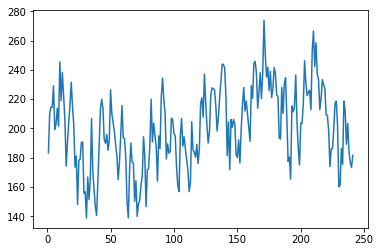

(241,)


In [2]:
data=np.loadtxt("stock.txt", delimiter=",")

import matplotlib.pyplot as plt
plt.plot(range(1, data.shape[0]+1), data)
plt.show()
print(np.shape(data))

The goal of this exercise is to use several (let us say $N$) previous share prices in order to predict the share price for today. This is useful because we can buy or sell the price before its price rises or falls and in that way increase our profit or lower our loss. The first step is to find the input-output pairs, which will be used on order to train our network. The size of this set will be defined using variable $i$. Our inputs will be vectors $\mathbf{a}_i$, which we put in matrix $\mathbf{A}$. Outputs are scalar values, which we put in vector $y$.

**Tasks**

1. Write the function *memory*, which for given day in the year (index of the variable *data*) constructs a column vector $\mathbf{a}$ whose elements represent the prices for last *N* days but without the price for today.
2. Using the function *memory *write a function *memorize*, which for given inputs (*data*, *day*, *N*, *i*) constructs the matrix $\mathbf{A}$ in which each column vector represents the $\mathbf{a}_i$ for the previous day. So, matrix $\mathbf{A}$ memorizes $i$ memories which we will use in order to train our network.

In [3]:
# WRITE YOUR CODE HERE
def memory(data,index,N):
    return np.array([data[index - i] for i in range(1,N+1)][::-1])

def memorize(data,day,N,i):
    a = []
    for j in range(day-i,day):
        a.append(memory(data,j,N))
    return np.vstack(a).T
    

Construct the matrix $\mathbf{A}$ using the command:

In [4]:
day=151
N=70
i=50
A=memorize(data, day, N, i)

The output vector is constructed using the command:

In [5]:
y=np.array([data[day-i+1:day+1]])

We initialize the perceptron as follows:

In [6]:
def initp(data, labels):
    return -0.5+np.random.rand(labels.shape[0], data.shape[0]+1)

W=initp(A, y)

We train the perceptron using the command:

In [7]:
ni=1e-8
max_num_iter=10000

W1, errors=trainlms(ni, A, y, W, max_num_iter)

Weights of the network are memorized in the matrix $\mathbf{W}_1$. Variable *ni* should be experimentally found. Train the network for different values of *i*, *N*, *max_num_iter*. We can visualize the output of the network on the training data using the following command:

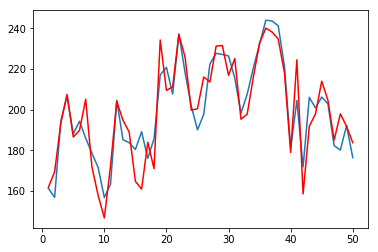

In [8]:
p=predict(W1, A)

plt.plot(range(1, y[0].shape[0]+1), y[0])
plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
plt.show()

Here, the blue color shows the predicted values and the red color shows the real outputs.

**Tasks**

1. Memorize different weight matrices ($\mathbf{W}_1$, $\mathbf{W}_2$...) with different combinations of following parameters *i*=30, 50 or 100; *N*=20, 50 or 80; *max_num_iter*=10000, 50000 or 500000. (Choose 6 different combinations.) For selected parameter combinations show the obtained predictions with real values. Comment the obtained results.

30 20 10000


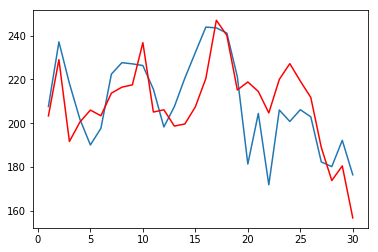

30 20 50000


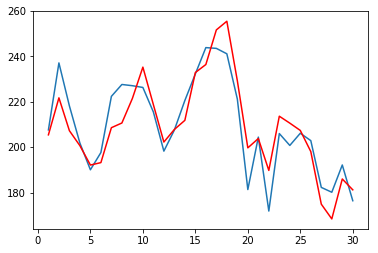

30 20 500000


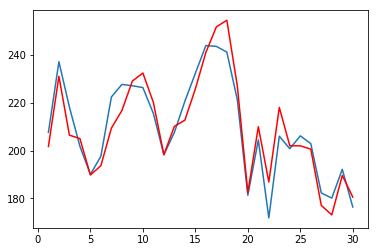

30 50 10000


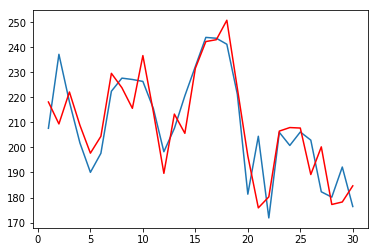

30 50 50000


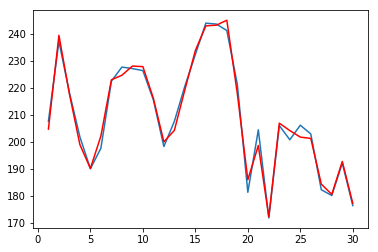

30 50 500000


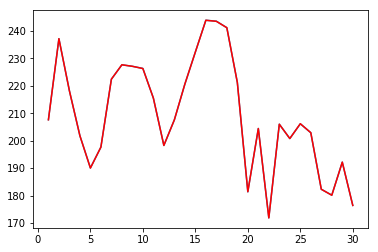

30 80 10000


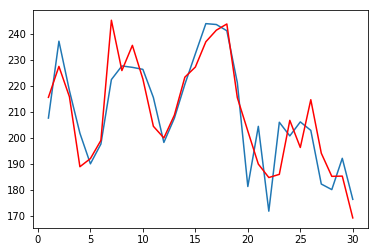

30 80 50000


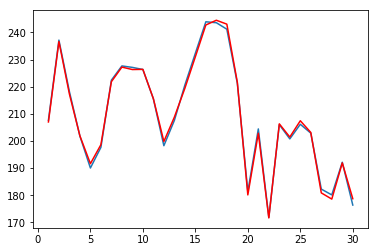

30 80 500000


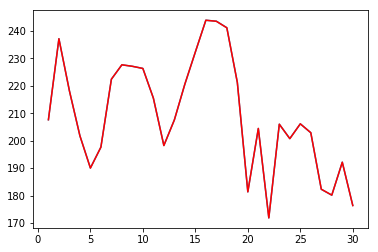

50 20 10000


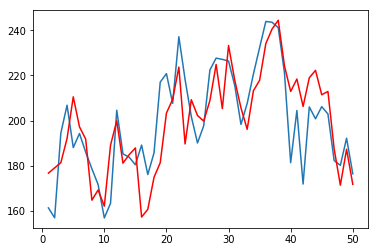

50 20 50000


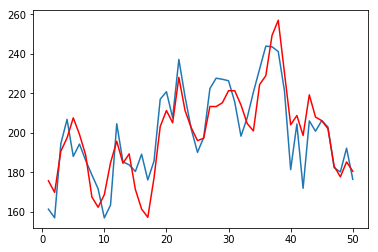

50 20 500000


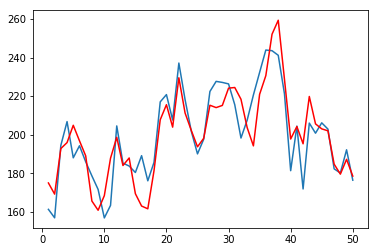

50 50 10000


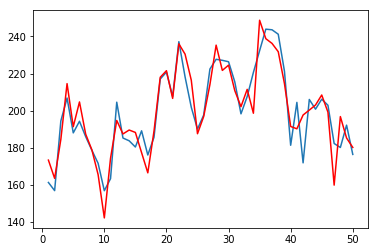

50 50 50000


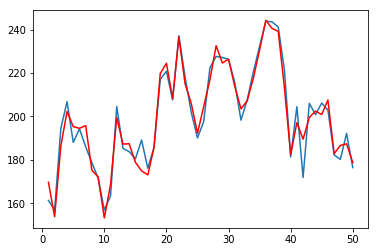

50 50 500000


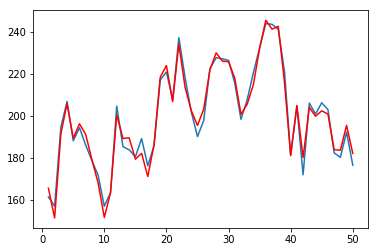

50 80 10000


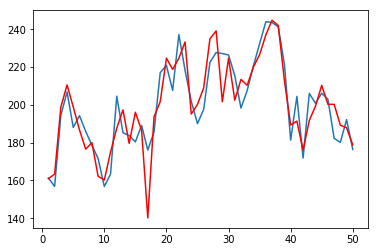

50 80 50000


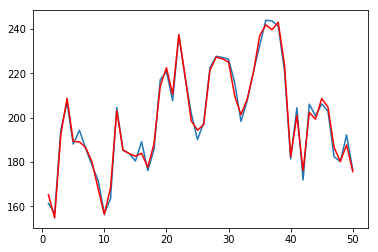

50 80 500000


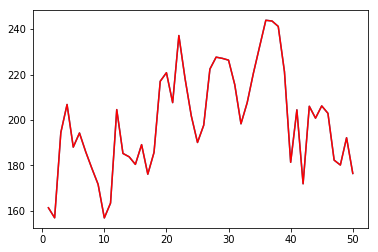

100 20 10000


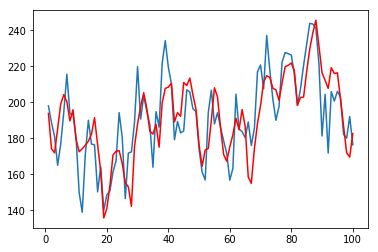

100 20 50000


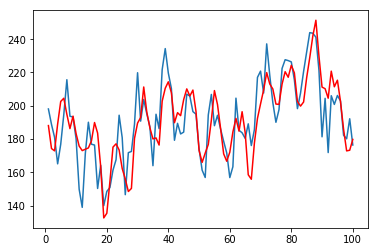

100 20 500000


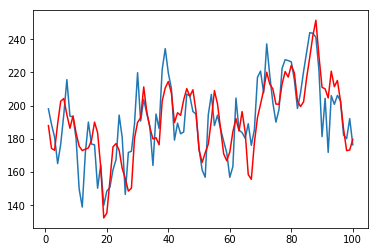

100 50 10000


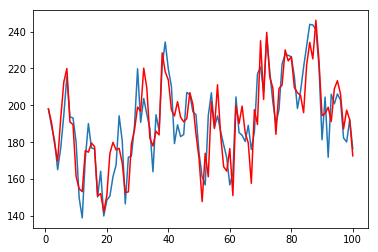

100 50 50000


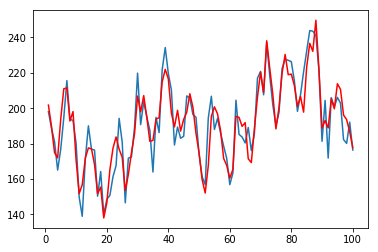

100 50 500000


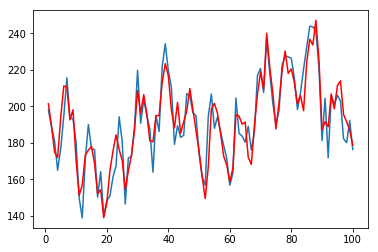

100 80 10000


/Users/johanez/anaconda2/envs/nnets/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/Users/johanez/anaconda2/envs/nnets/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


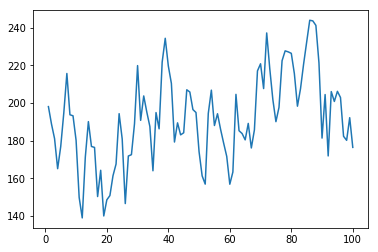

100 80 50000


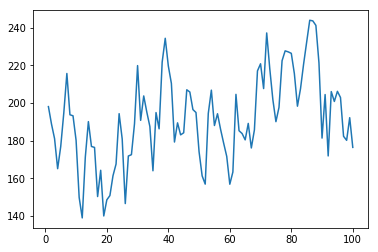

100 80 500000


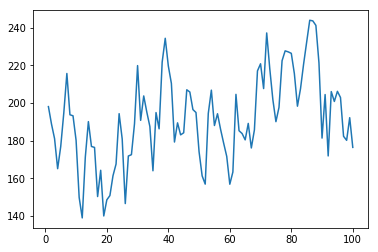

In [14]:
# WRITE YOUR CODE HERE
day=151
i = [30,50,100]
N = [20,50,80]
max_num_iter = [10000, 50000, 500000]
params = [i,N,max_num_iter]
pom = []
for _i, _N, _max_num_iter in itertools.product(*params):
    print(_i, _N, _max_num_iter)
    A=memorize(data, day, _N, _i)
    y=np.array([data[day-_i+1:day+1]])
    W=initp(A, y)
    _W, errors=trainlms(ni, A, y, W, _max_num_iter)
    p=predict(_W, A)
    plt.plot(range(1, y[0].shape[0]+1), y[0])
    plt.plot(range(1, p[0].shape[0]+1), p[0], c="red")
    plt.show()
    pom.append(_W)

If we do not use any intelligence for stock price prediction and we assume the price will be (almost) the same tomorrow, the error we make is:

In [11]:
a=data[day:day+1]          # price today - we assume the same price tomorrow
print(day,a)
y=data[day+1:day+2]        # the real price tomorrow
print(day+1,y)
err_oo=np.sum(np.abs(y-a)) # error
print(err_oo)

151 [ 176.4]
152 [ 199.22]
22.82


If we use the network trained on previous days to predict the price for tomorrow, the error is as follows:

In [12]:
p=predict(W1, memorize(data, day+1, N, 1))
err_nn=np.sum(np.abs(y-p))
print(err_nn)

60.4234391214


If we trade each day with the given stock, our error can be easily measured. Our potential profit can be calculated as follows:

In [13]:
profit=err_oo-err_nn
print(profit)

-37.6034391214


To predict the price of the day after tomorrow, we could use the same network or we could train the network from scratch by also using the data of the day before the day after tomorrow i.e. by using the data of tomorrow. Which way would be better?

**Tasks**

1. Create a table in which you will show the obtained profit levels depending on the parameters used (*i*, *N*, and *max_num_iter*). For of these parameter triplets the profit should be the sum of the profit for every possible *day* for which training data defined by *i* and *N* exists.

In [15]:
# WRITE YOUR CODE HERE
def calc_profit(w,data,day,N,i):
    a=data[i:day+1]          # price today - we assume the same price tomorrow
    y=data[i+1:day+2]        # the real price tomorrow
    err_oo=np.sum(np.abs(y-a)) # error
    
    p=predict(w, memorize(data, day+1, N, 1))
    err_nn=np.sum(np.abs(y-p))
    return err_oo-err_nn

In [16]:
profit = []
day=151
i = [30,50,100]
N = [20,50,80]
max_num_iter = [10000, 50000, 500000]
_W = pom[:-3]
params = [i,N,max_num_iter]
pom = []
for _i, _N, _max_num_iter in itertools.product(*params):
    pom.append(tuple((_i,_N,_max_num_iter)))

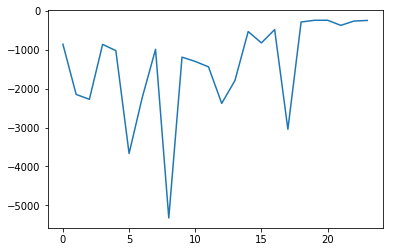

In [17]:
for w,triplet in zip(_W,pom):
    _i = triplet[0]
    _N = triplet[1]
    _max_num_iter = triplet[2]
    profit.append(calc_profit(w,data,day,_N,_i))
plt.plot(profit)
plt.show()

In [20]:
print(np.min(profit),np.max(profit))
print(np.shape(profit))

-5324.90033515 -240.810648287
(24,)
